<a href="https://colab.research.google.com/github/gitcongf/Cloud-Couselage-DATA-ANALYSIS-PROJECT/blob/main/Airbnb_Sai%20Lakshmi%20updated%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Content/Airbnb_Open_Data.csv', low_memory=False)

# Understanding the Data

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# 1. Explaining the various variables

a) id: Unique serial number.

b) name: Description given to each accomodation.

c) host_id: Unique serial number given to each host.

d) host_name: Name of every host.

e) neighbourhood_group: Various boroughs(town/district) within New York city.

f) neighbourhood: Various divisions within each neighbourhood_group.

g) latitude and longitude: It is geographic coordinates that specify the position of a particular location.

h) room_type: Variety of rooms depending on the size.

i) price: Cost of the rooms.

j) minimum_nights: Number of nights, hosts stay in that accomodation.

k) number_of_reviews: Number of times hosts give reviews.

l) last_review: Date of last review.

m) reviews_per_month: Ratio of number of reviews to number of days in each month.

n) calculated_host_listings_count: Number of times a host visited that particular room.

o)availability_365: Number of days, rooms are available in a year.

In [9]:
# Checking Dataframe size
df.shape

(102599, 26)

So, the number of observations are 48895 and number of features are 16.

In [8]:
# Checking general info about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Some variables are of int, float and object datatype, which we have seen in the above table. There are also some null values which need to be dealt with.

In [ ]:
# Checking column names

air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
# Checking description of the data
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


 maximum value of minimum_nights is 5654

# 2. Data Cleaning

In [11]:
# Drop duplicate rows, if any
df.drop_duplicates(inplace= True)

In [12]:
# Check for null values in each column
df.isna().sum()

,0
id,0
NAME,250
host id,0
host_identity_verified,289
host name,404
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


We can remove null values of host name. Also we can replace null values of reviews per month with 0.

In [13]:
# Remove null values from host_name
df.dropna(axis=0, subset=['host name'], inplace=True)

In [22]:
# Replacing null values of reviews_per_month with 0
df['reviews per month'] = df['reviews per month'].fillna(0)

In [23]:
# Removing columns which doesn't contribute much in exploration of data and storing in new dataframe
df = df.drop(['id', 'host id', 'last review'], axis = 1)

As we have successfully removed all null values from the data, we can now move to exploration of data.

##  Host_name

First variable which we will be analysing is 'host_name'.
Here, we are going to explore the behaviours of hosts.

In [33]:
# Total number of hosts
df['host name'].nunique()

13190

In [36]:
# Top 10 hosts which have higher spending value
data_sorted = df.sort_values(by='price', ascending=False)
# Select the top 10 hosts with the highest spending values
top_10_hosts = data_sorted.head(10)
# Display the result
print(top_10_hosts)

                                               NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   
5         Large Cozy 1 BR Apartment In Midtown East               verified   
6                                   BlissArtsSpace!                    NaN   
7                                   BlissArtsSpace!            unconfirmed   
8                   Large Furnished Room Near B'way               verified   
9                Cozy Clean Guest Room - Family Apt            unconfirmed   

  host name neighbourhood group       neighbourhood       lat      long  \
0  Madaline            Brooklyn          Kensington  40.64749 -73.

top 10 with high spending

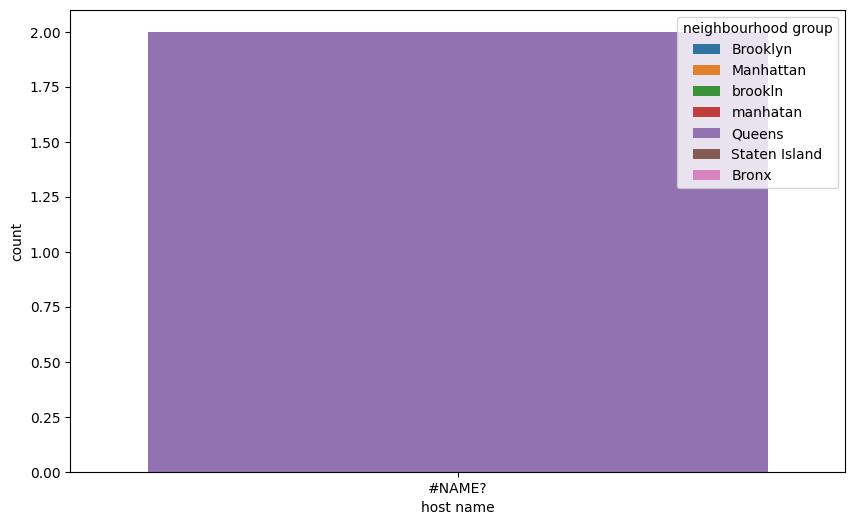

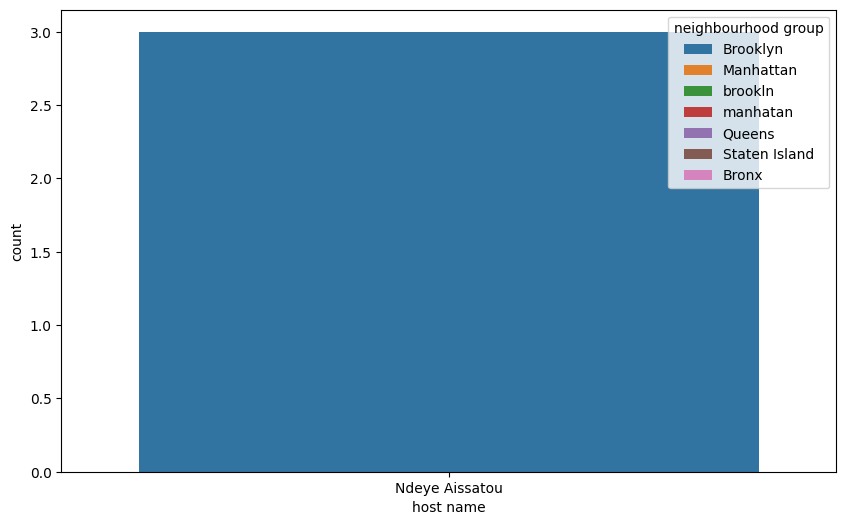

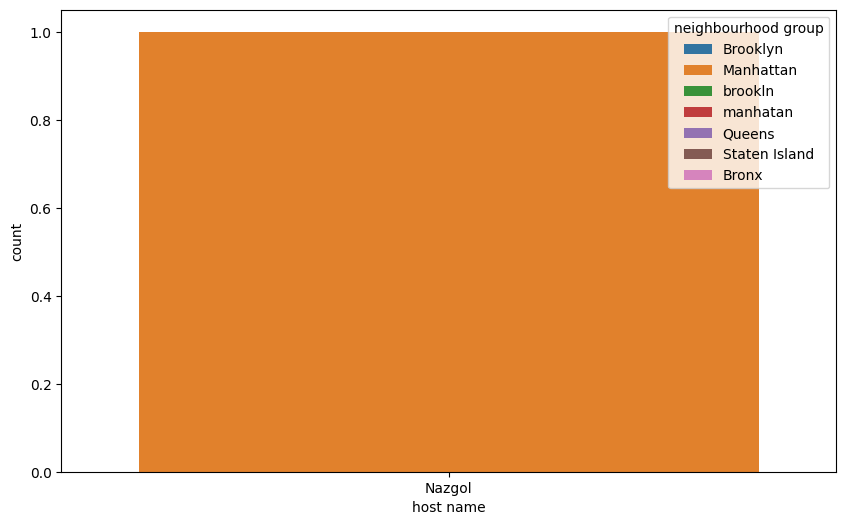

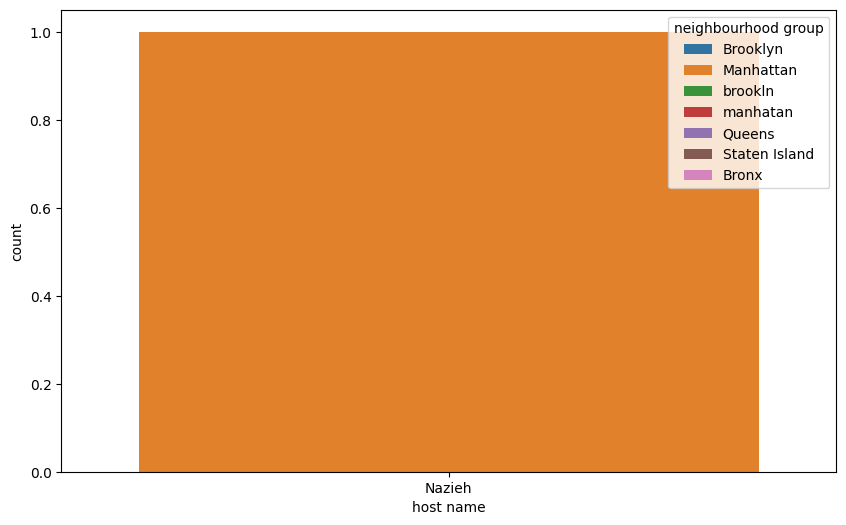

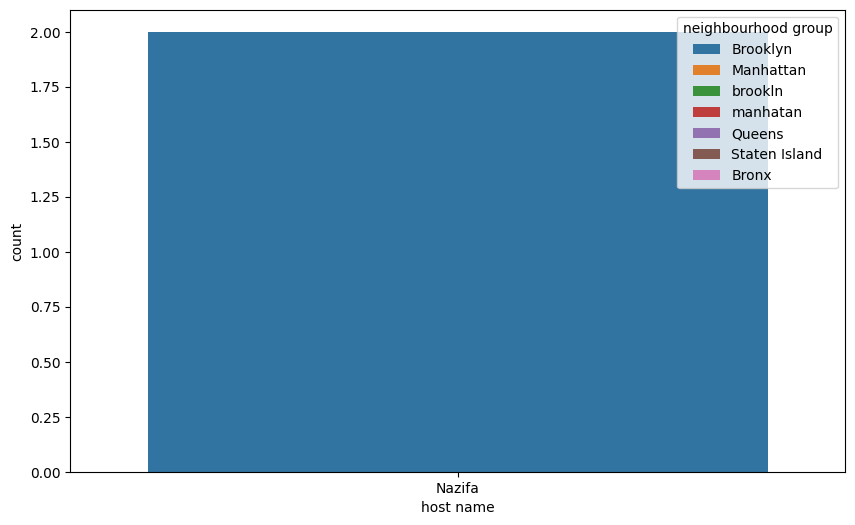

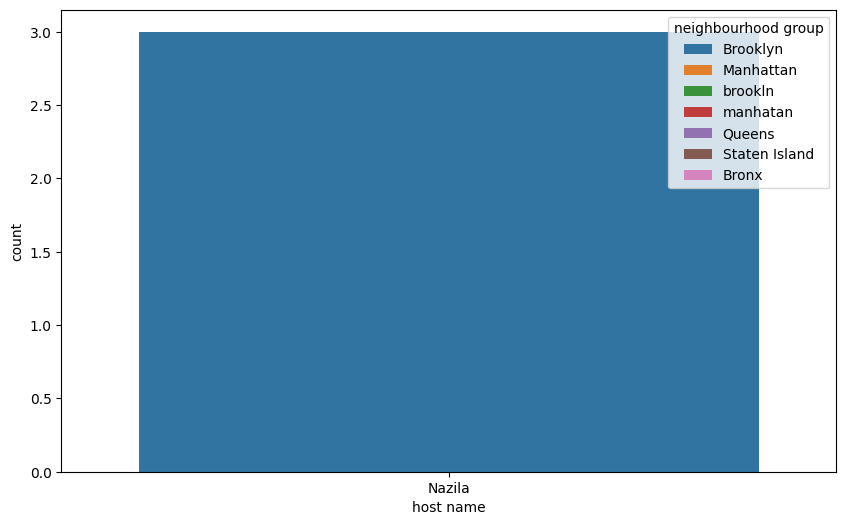

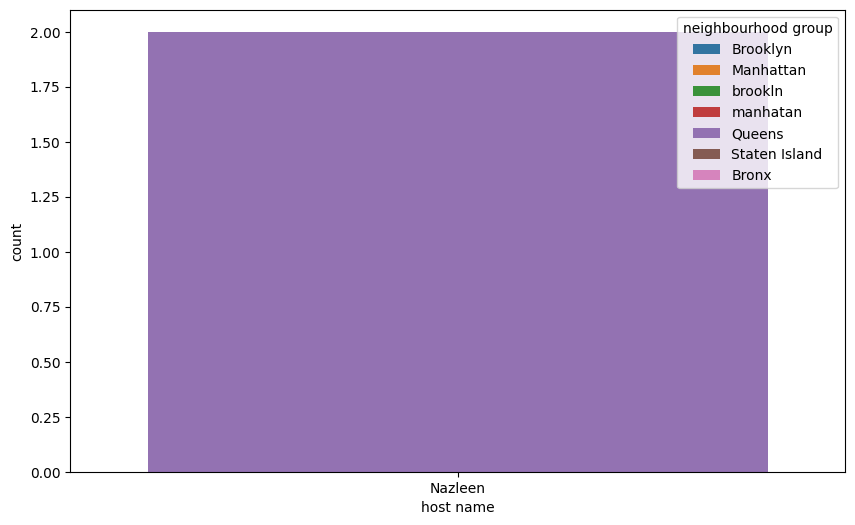

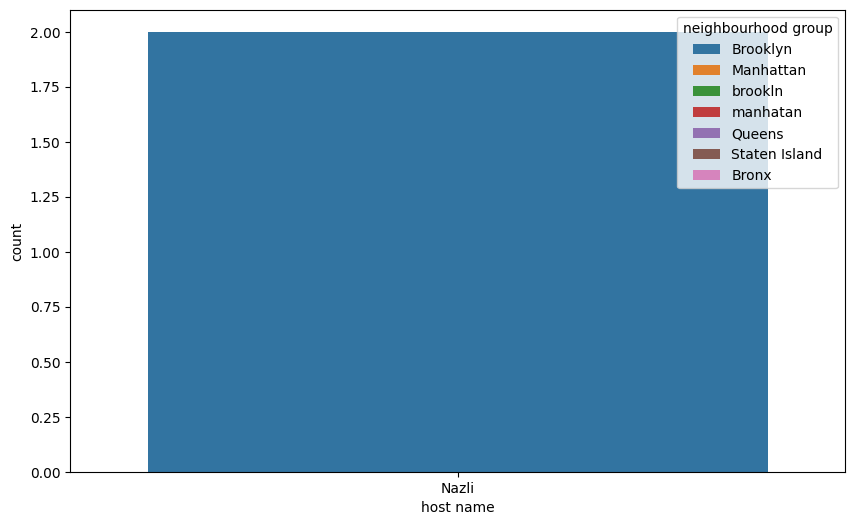

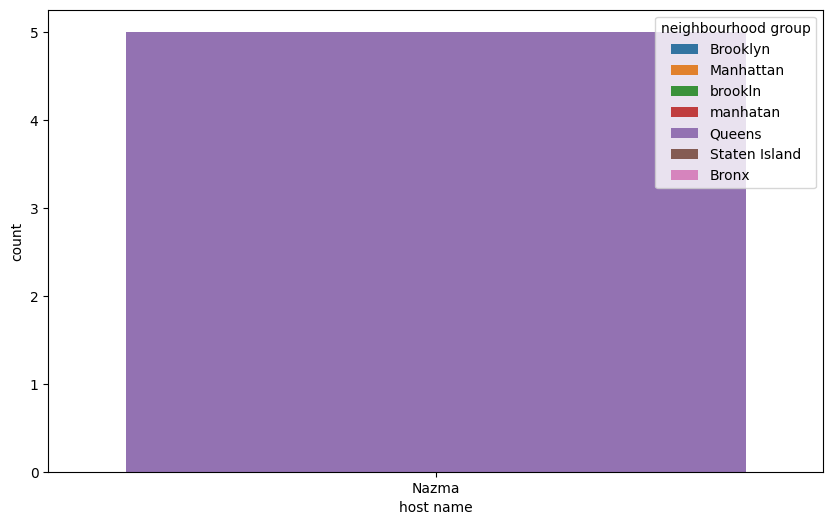

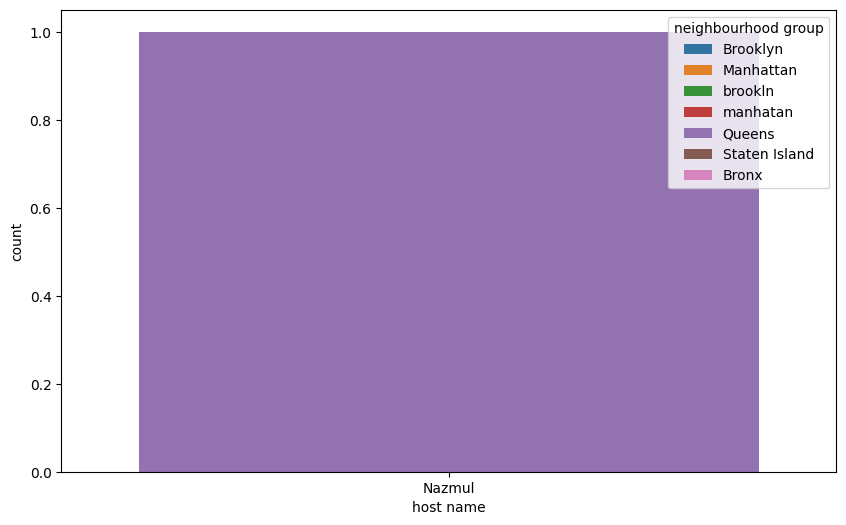

In [38]:
# neighbourhood_group are most visited by this top 10 highly spending hosts
for index, col in top_10_affluent_hosts.items():
  plt.figure(figsize=[10,6])
  sns.countplot(x = df[df['host name']==index]['host name'], hue=df['neighbourhood group'])

TOP 10

Nazmul,Nazma, Nasleen Queens.

Nazli, Nazila, Nazifa and Ndeye.A Brooklyn

Nazieh, Nazgol Manhattan

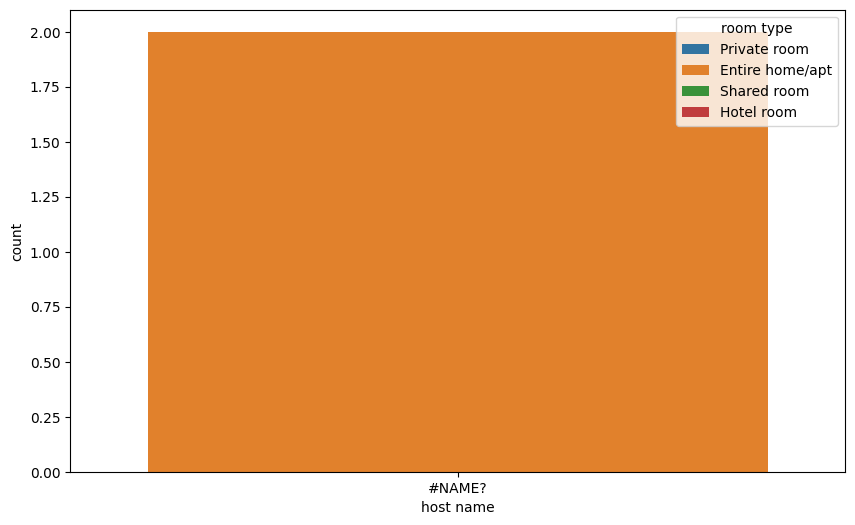

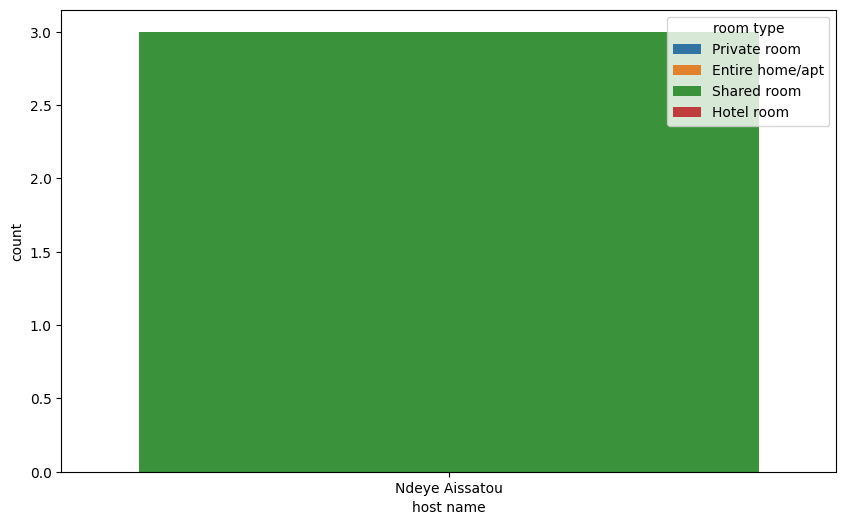

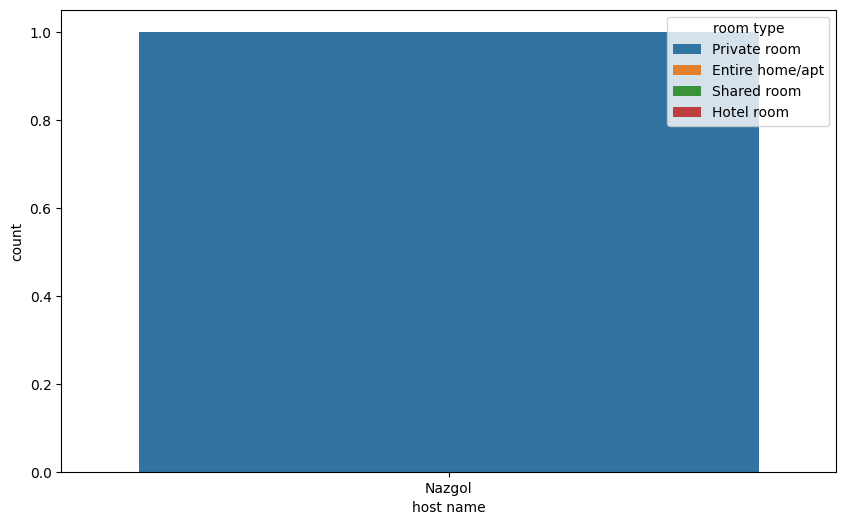

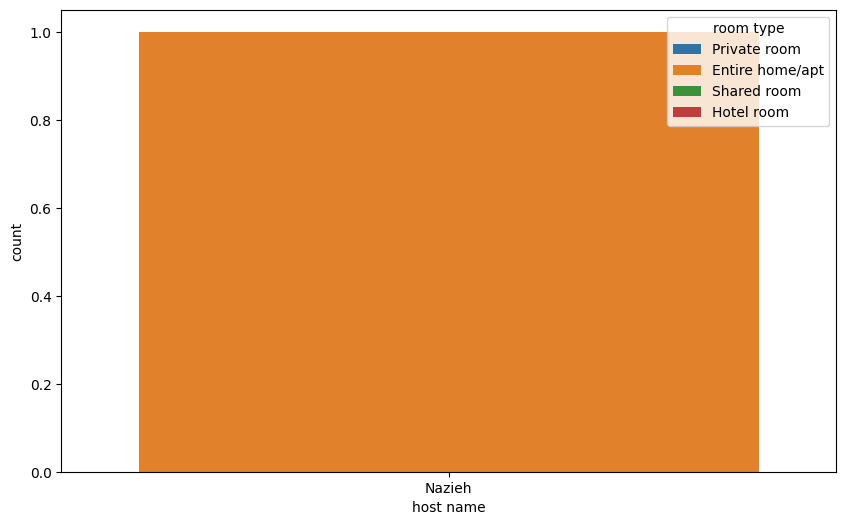

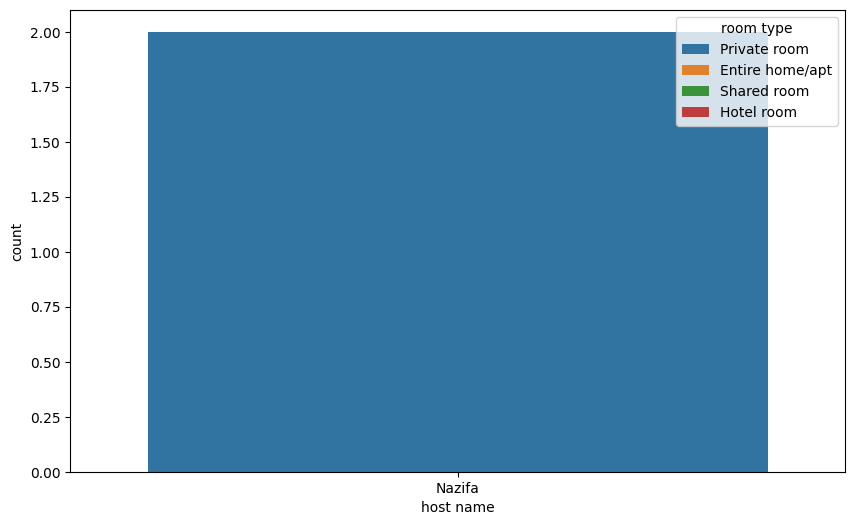

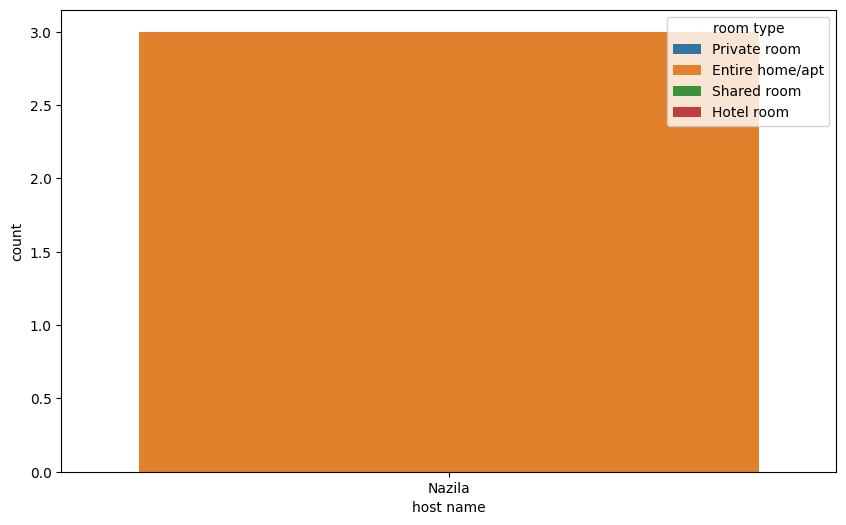

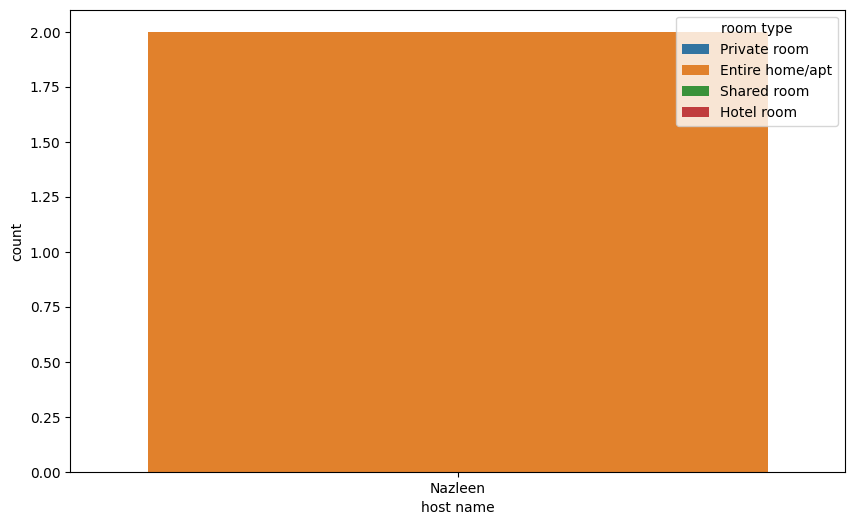

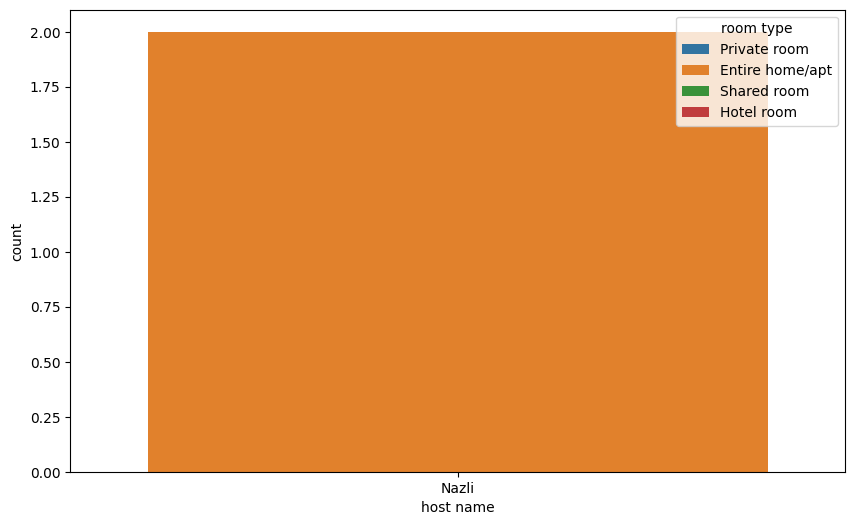

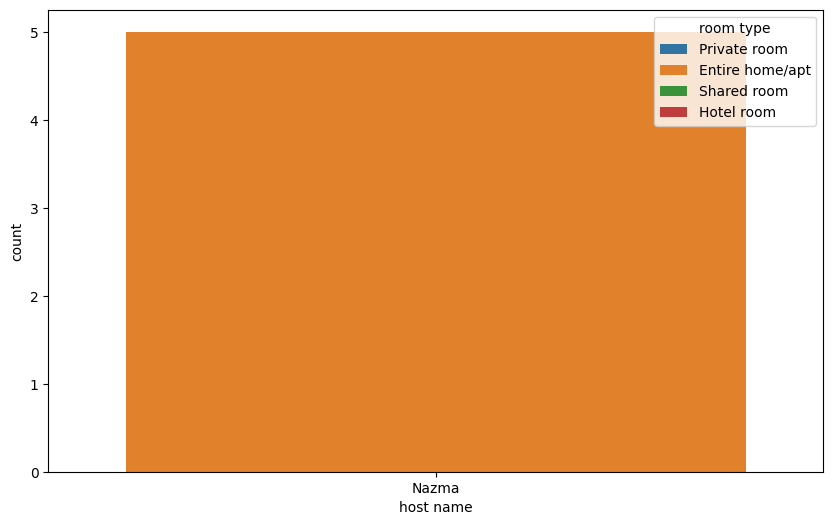

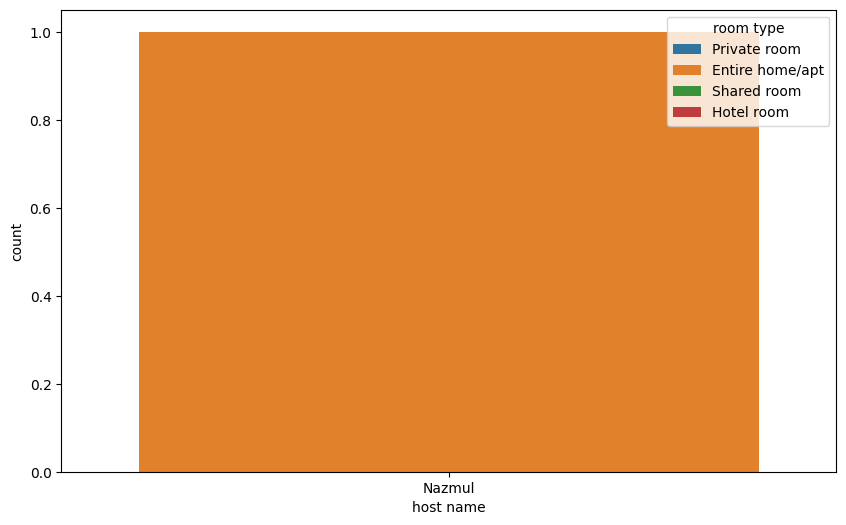

In [40]:
# Which room type do hosts prefer
for index, col in top_10_affluent_hosts.items():
  plt.figure(figsize=[10,6])
  sns.countplot(x = df[ df['host name']==index]['host name'], hue=df['room type'])


The above shows which room_type do our hosts prefer.

Nazmul,Nazma,Nazli,Nazleen,Nazila,Nazieh prefer Entire home/apt

others prefer private, shared, hotel room type

## b. Neighbourhood_group

Using this variable, we are going to analyse why some neighbourhood groups are most favoured by customers.

In [41]:
#Unique room type
a2 = df['room type'].unique()

In [42]:
#Unique neighbourhood groups
a3 = df['neighbourhood group'].unique()

In [44]:
#Grouping count of different rooms in different neighbourhood group
for g_name in a3:
  # Check if g_name is a float (likely nan) and convert it to a string
  if isinstance(g_name, float):
    g_name = str(g_name)
  for rtype in a2:
    print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))

<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))


Brooklyn and Private room 20227
Brooklyn and Entire home/apt 20409
Brooklyn and Shared room 824
Brooklyn and Hotel room 7


<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))


Manhattan and Private room 16147
Manhattan and Entire home/apt 26240
Manhattan and Shared room 892
Manhattan and Hotel room 100


<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " an

brookln and Private room 1
brookln and Entire home/apt 0
brookln and Shared room 0
brookln and Hotel room 0
manhatan and Private room 1


<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " an

manhatan and Entire home/apt 0
manhatan and Shared room 0
manhatan and Hotel room 0
Queens and Private room 7674
Queens and Entire home/apt 5107
Queens and Shared room 359


<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " an

Queens and Hotel room 8
nan and Private room 0
nan and Entire home/apt 0
nan and Shared room 0
nan and Hotel room 0
Staten Island and Private room 457
Staten Island and Entire home/apt 473
Staten Island and Shared room 14
Staten Island and Hotel room 0
Bronx and Private room 1557
Bronx and Entire home/apt 1016
Bronx and Shared room 113
Bronx and Hotel room 0


<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " and " + rtype, len(df[df["neighbourhood group"] == g_name][df["room type"] == rtype]))
<ipython-input-44-ce2899306f7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(g_name + " an

This shows the number of rooms according to room types in each neighbourhood group.

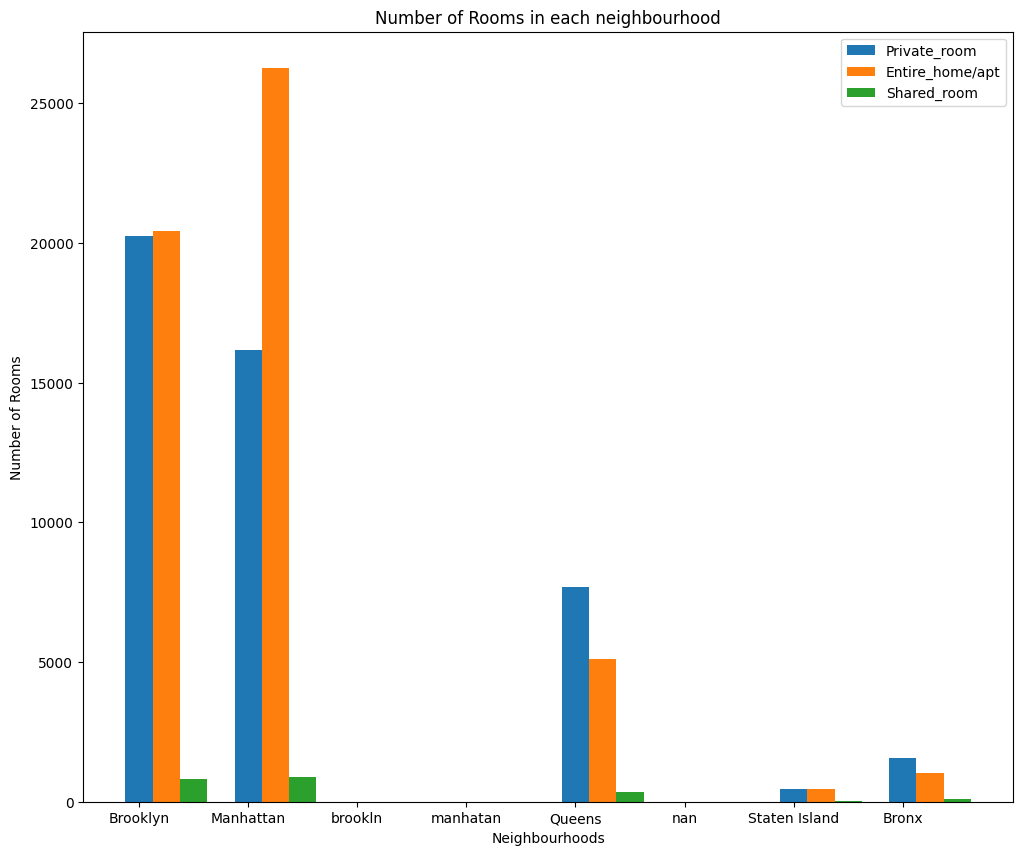

In [46]:
#Representing count of types of rooms in every neighbourhood group
X_axis = np.arange(len(a3))
width = 0.25
plt.figure(figsize=[12, 10])

# Calculate and store the counts for each room type in each neighborhood group
Private_room = [len(df[(df["neighbourhood group"] == g_name) & (df["room type"] == 'Private room')]) for g_name in a3]
Entire_home = [len(df[(df["neighbourhood group"] == g_name) & (df["room type"] == 'Entire home/apt')]) for g_name in a3]
Shared_room = [len(df[(df["neighbourhood group"] == g_name) & (df["room type"] == 'Shared room')]) for g_name in a3]

# Now plot the data
plt.bar(X_axis, Private_room, 0.25, label = 'Private_room')
plt.bar(X_axis + width, Entire_home, 0.25, label = 'Entire_home/apt')
plt.bar(X_axis + width*2, Shared_room, 0.25, label = 'Shared_room')
plt.xticks(X_axis, a3)
plt.xlabel("Neighbourhoods")
plt.ylabel("Number of Rooms")
plt.title("Number of Rooms in each neighbourhood")
plt.legend()
plt.show()
plt.show()

According to the chart, it is clearly visible the most favoured room type in each neighbourhood group.

Private_room and Entire_home/apt is the most preferred choice in each neighbourhood_group, Manhattan and Brooklyn respectively. Queens followed by Bronx and Staten Island are less prefered.

<Axes: xlabel='price', ylabel='Count'>

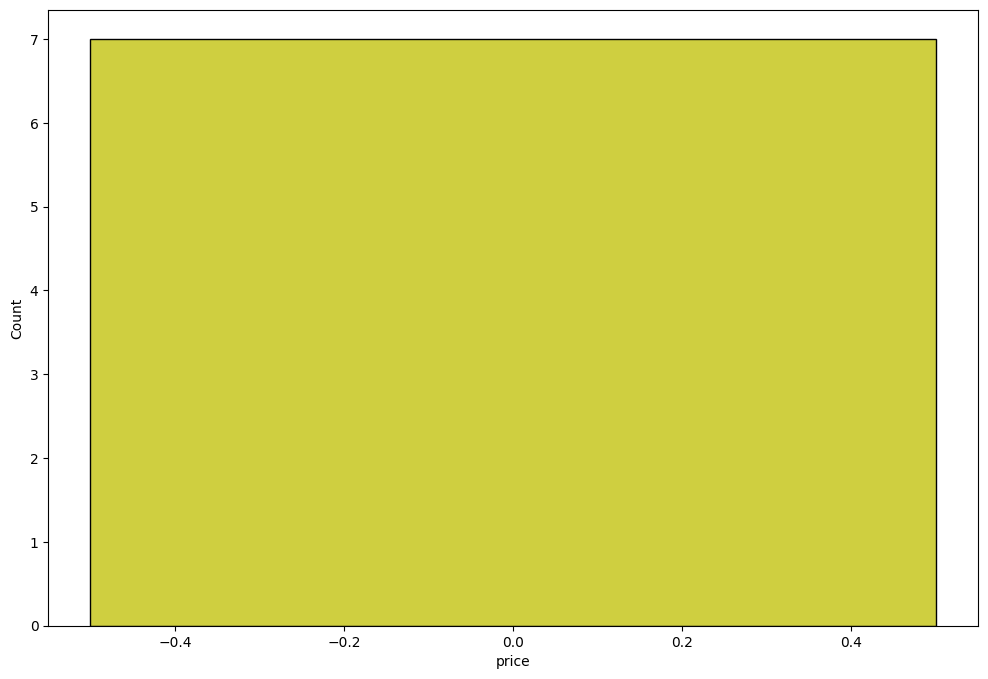

In [80]:
plt.figure(figsize=(12,8))
sns.histplot(df['price'],color="y")

In [81]:
# Number of prices in each price group
df['price_group'] = df['price'].apply(lambda x : 0 if x<100 else (1 if 100<= x < 200 else 2))
df['price_group'].value_counts()

,count
price_group,
0,7


In [82]:
# Percentage of room alloted to people with price less than 200

print(f'Percentage of room alloted to people with price less than 200: {round((21867+17224)/(21867+17224+9783)*100,2)}%')

Percentage of room alloted to people with price less than 200: 79.98%


Following code can be interpreted as, there are..

 Percetage of alloted room with price less 200 is 79.98%